In [1]:
%load_ext sql

Deploy FastAPI apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


Tip: You may define configurations in /Users/cjm/repos/go-db/pyproject.toml or /Users/cjm/.jupysql/config.

Did not find user configurations in /Users/cjm/repos/go-db/pyproject.toml.

In [2]:
%sql duckdb:///../../tmp/ecocyc.db

Connecting to 'duckdb:///../../tmp/ecocyc.db'

In [3]:
%%sql
CREATE VIEW IF NOT EXISTS EC_rule_violation AS
SELECT DISTINCT a.internal_id, 'EC_rule' AS rule, a.db, a.db_object_id, a.ontology_class_ref AS t1, b.ontology_class_ref AS t2, e.xref AS ec1, e2.xref AS ec2, a.db_object_symbol, a.db_object_taxon
FROM gaf_association AS a,
    gaf_association AS b,
    term_ec AS e,
    term_ec AS e2
WHERE e.level = 4
 AND e2.level = 4
 AND a.db_object_id = b.db_object_id
    AND a.ontology_class_ref != b.ontology_class_ref
    AND a.db = b.db
    AND b.ontology_class_ref = e2.id
    AND a.ontology_class_ref = e.id
    AND a.ontology_class_ref IN (SELECT id FROM term_ec WHERE level = 4)
    AND b.ontology_class_ref IN (SELECT id FROM term_ec WHERE level = 4);

Running query in 'duckdb:///../../tmp/ecocyc.db'

Count


In [13]:
%%sql
SELECT count(*) FROM EC_rule_violation WHERE ec1 != ec2;

Running query in 'duckdb:///../../tmp/ecocyc.db'

count_star()
8648


In [12]:
%%sql
SELECT * FROM EC_rule_violation WHERE ec1 != ec2 LIMIT 10;

Running query in 'duckdb:///../../tmp/ecocyc.db'

internal_id,rule,db,db_object_id,t1,t2,ec1,ec2,db_object_symbol,db_object_taxon
37329,EC_rule,UniProtKB,P31119,GO:0008779,GO:0004467,EC:2.3.1.40,EC:6.2.1.3,aas,taxon:83333
17564,EC_rule,UniProtKB,P0ABF6,GO:0004126,GO:0047844,EC:3.5.4.5,EC:3.5.4.14,cdd,taxon:83333
31761,EC_rule,UniProtKB,P19926,GO:0008877,GO:0050308,EC:3.1.3.10,EC:3.1.3.23,agp,taxon:83333
57629,EC_rule,UniProtKB,P40874,GO:0008115,GO:0050131,EC:1.5.3.1,EC:1.5.3.2,solA,taxon:83333
23410,EC_rule,UniProtKB,P0AES0,GO:0008884,GO:0008885,EC:3.5.1.78,EC:6.3.1.8,gss,taxon:83333
23409,EC_rule,UniProtKB,P0AES0,GO:0008884,GO:0008885,EC:3.5.1.78,EC:6.3.1.8,gss,taxon:83333
32022,EC_rule,UniProtKB,P21177,GO:0004165,GO:0003857,EC:5.3.3.8,EC:1.1.1.35,fadB,taxon:83333
32021,EC_rule,UniProtKB,P21177,GO:0004165,GO:0003857,EC:5.3.3.8,EC:1.1.1.35,fadB,taxon:83333
31953,EC_rule,UniProtKB,P21165,GO:0016805,GO:0102009,EC:3.4.13.18,EC:3.4.13.9,pepQ,taxon:83333
31951,EC_rule,UniProtKB,P21165,GO:0016805,GO:0102009,EC:3.4.13.21,EC:3.4.13.9,pepQ,taxon:83333


In [27]:
%%sql
CREATE OR REPLACE VIEW EC_rule_violation_info AS
   SELECT DISTINCT ec1,ec2,db_object_id,db_object_symbol,t1,l1.label AS t1label, t2, l2.label AS t2label
   FROM EC_rule_violation r INNER JOIN term_label l1 ON l1.id=t1 INNER JOIN term_label l2 ON l2.id=t2
   WHERE ec1 != ec2
     AND NOT EXISTS (select 1 from entailed_edge where subject=t1 and object=t2) AND NOT EXISTS (select 1 from entailed_edge where subject=t2 and object=t1) 
   ORDER BY ec1, ec2;

Running query in 'duckdb:///../../tmp/ecocyc.db'

Count


In [30]:
rows = %sql select * from EC_rule_violation_info;
data = rows.DataFrame()
data

Running query in 'duckdb:///../../tmp/ecocyc.db'

,ec1,ec2,db_object_id,db_object_symbol,t1,t1label,t2,t2label
0,EC:1.1.1.1,EC:1.1.1.103,P37686,yiaY,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0008743,L-threonine 3-dehydrogenase activity
1,EC:1.1.1.1,EC:1.1.1.284,P25437,frmA,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0106321,S-(hydroxymethyl)glutathione dehydrogenase NAD...
2,EC:1.1.1.1,EC:1.1.1.284,P25437,frmA,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0051903,S-(hydroxymethyl)glutathione dehydrogenase act...
3,EC:1.1.1.1,EC:1.1.1.284,P25437,frmA,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0106322,S-(hydroxymethyl)glutathione dehydrogenase NAD...
4,EC:1.1.1.1,EC:1.1.1.77,P0A9S1,fucO,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0008912,lactaldehyde reductase activity
...,...,...,...,...,...,...,...,...
4735,EC:7.1.1.9,EC:7.1.1.3,P0ABI8,cyoB,GO:0004129,cytochrome-c oxidase activity,GO:0009486,cytochrome bo3 ubiquinol oxidase activity
4736,EC:7.2.2.12,EC:7.2.2.21,P37617,zntA,GO:0016463,P-type zinc transporter activity,GO:0008551,P-type cadmium transporter activity
4737,EC:7.2.2.21,EC:7.2.2.12,P37617,zntA,GO:0008551,P-type cadmium transporter activity,GO:0016463,P-type zinc transporter activity
4738,EC:7.2.2.8,EC:7.2.2.9,Q59385,copA,GO:0140581,P-type monovalent copper transporter activity,GO:0043682,P-type divalent copper transporter activity


In [34]:
def compare_levels(ec1, ec2):
    ec1 = ec1.split('.')
    ec2 = ec2.split('.')
    for i in range(min(len(ec1), len(ec2))):
        if ec1[i] != ec2[i]:
            return 4-i
    return min(len(ec1), len(ec2))
assert compare_levels("EC:1.1.1.1", "EC:1.2.1.1") == 3
assert compare_levels("EC:1.1.1.1", "EC:1.1.1.2") == 1

In [35]:
# create a new column at start of dataframe with the level of the comparison
data['level'] = data.apply(lambda row: compare_levels(row['ec1'], row['ec2']), axis=1)
data

,ec1,ec2,db_object_id,db_object_symbol,t1,t1label,t2,t2label,level
0,EC:1.1.1.1,EC:1.1.1.103,P37686,yiaY,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0008743,L-threonine 3-dehydrogenase activity,1
1,EC:1.1.1.1,EC:1.1.1.284,P25437,frmA,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0106321,S-(hydroxymethyl)glutathione dehydrogenase NAD...,1
2,EC:1.1.1.1,EC:1.1.1.284,P25437,frmA,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0051903,S-(hydroxymethyl)glutathione dehydrogenase act...,1
3,EC:1.1.1.1,EC:1.1.1.284,P25437,frmA,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0106322,S-(hydroxymethyl)glutathione dehydrogenase NAD...,1
4,EC:1.1.1.1,EC:1.1.1.77,P0A9S1,fucO,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0008912,lactaldehyde reductase activity,1
...,...,...,...,...,...,...,...,...,...
4735,EC:7.1.1.9,EC:7.1.1.3,P0ABI8,cyoB,GO:0004129,cytochrome-c oxidase activity,GO:0009486,cytochrome bo3 ubiquinol oxidase activity,1
4736,EC:7.2.2.12,EC:7.2.2.21,P37617,zntA,GO:0016463,P-type zinc transporter activity,GO:0008551,P-type cadmium transporter activity,1
4737,EC:7.2.2.21,EC:7.2.2.12,P37617,zntA,GO:0008551,P-type cadmium transporter activity,GO:0016463,P-type zinc transporter activity,1
4738,EC:7.2.2.8,EC:7.2.2.9,Q59385,copA,GO:0140581,P-type monovalent copper transporter activity,GO:0043682,P-type divalent copper transporter activity,1


In [37]:
# reorder columns so level is first
data = data[['level', 'ec1', 'ec2', 'db_object_id', 'db_object_symbol', 't1', 't1label', 't2', 't2label']]
data

,level,ec1,ec2,db_object_id,db_object_symbol,t1,t1label,t2,t2label
0,1,EC:1.1.1.1,EC:1.1.1.103,P37686,yiaY,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0008743,L-threonine 3-dehydrogenase activity
1,1,EC:1.1.1.1,EC:1.1.1.284,P25437,frmA,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0106321,S-(hydroxymethyl)glutathione dehydrogenase NAD...
2,1,EC:1.1.1.1,EC:1.1.1.284,P25437,frmA,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0051903,S-(hydroxymethyl)glutathione dehydrogenase act...
3,1,EC:1.1.1.1,EC:1.1.1.284,P25437,frmA,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0106322,S-(hydroxymethyl)glutathione dehydrogenase NAD...
4,1,EC:1.1.1.1,EC:1.1.1.77,P0A9S1,fucO,GO:0004022,alcohol dehydrogenase (NAD+) activity,GO:0008912,lactaldehyde reductase activity
...,...,...,...,...,...,...,...,...,...
4735,1,EC:7.1.1.9,EC:7.1.1.3,P0ABI8,cyoB,GO:0004129,cytochrome-c oxidase activity,GO:0009486,cytochrome bo3 ubiquinol oxidase activity
4736,1,EC:7.2.2.12,EC:7.2.2.21,P37617,zntA,GO:0016463,P-type zinc transporter activity,GO:0008551,P-type cadmium transporter activity
4737,1,EC:7.2.2.21,EC:7.2.2.12,P37617,zntA,GO:0008551,P-type cadmium transporter activity,GO:0016463,P-type zinc transporter activity
4738,1,EC:7.2.2.8,EC:7.2.2.9,Q59385,copA,GO:0140581,P-type monovalent copper transporter activity,GO:0043682,P-type divalent copper transporter activity


In [38]:
data.to_csv('/tmp/ecocyc_ec_rule_violation_info.csv', index=False)

In [29]:
%%sql
COPY (SELECT * FROM EC_rule_violation_info) TO '/tmp/ecocyc_ec_rule_violation_info.tsv' WITH CSV HEADER;

Running query in 'duckdb:///../../tmp/ecocyc.db'

Count


In [4]:
%%sql
CREATE VIEW IF NOT EXISTS EC_rule_violation_by_taxon_summary AS
SELECT t1, t2, ec1, ec2, COUNT(distinct db_object_taxon) AS taxon_count
FROM EC_rule_violation GROUP BY t1, t2, ec1, ec2;

Running query in 'duckdb:///../../tmp/ecocyc.db'

Count


In [5]:
rows = %sql select l1.label AS l1,l2.label AS l2,r.* from EC_rule_violation_by_taxon_summary r INNER JOIN term_label AS l1 on t1=l1.id INNER JOIN term_label AS l2 on t2=l2.id WHERE t1!=t2 AND NOT EXISTS (select 1 from entailed_edge where subject=t1 and object=t2) AND NOT EXISTS (select 1 from entailed_edge where subject=t2 and object=t1) ORDER BY taxon_count DESC;

Running query in 'duckdb:///../../tmp/ecocyc.db'

In [6]:
data = rows.DataFrame()

In [7]:
data["taxon_count"]

0       1
1       1
2       1
3       1
4       1
       ..
4735    1
4736    1
4737    1
4738    1
4739    1
Name: taxon_count, Length: 4740, dtype: int64

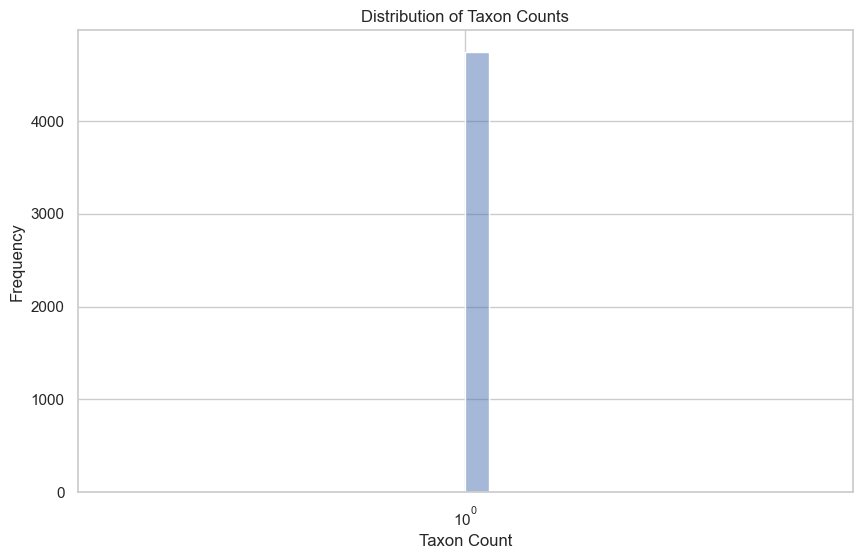

In [8]:
## plot distribution of taxon counts
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['taxon_count'], bins=30, kde=True, log_scale=True)
plt.title('Distribution of Taxon Counts')
plt.xlabel('Taxon Count')
plt.ylabel('Frequency')
plt.show()

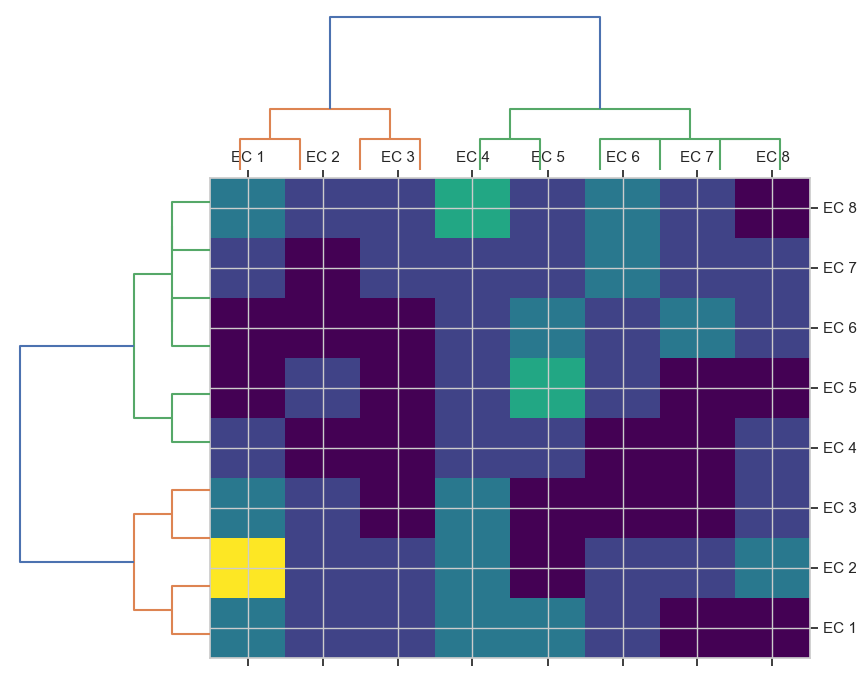

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Generate a simple hierarchical linkage matrix for dendrogram with binary splits
linkage_matrix = np.array([
    [0, 1, 0.1, 2],
    [2, 3, 0.1, 2],
    [4, 5, 0.1, 2],
    [6, 7, 0.1, 2],
    [8, 9, 0.1, 2],
    [10, 11, 0.1, 2],
    [12, 13, 0.2, 4],
    [14, 15, 0.2, 4],
    [16, 17, 0.5, 8]  # Ensure unique cluster combination without reuse
], dtype=float)

# Prepare the heatmap data
np.random.seed(0)
matrix = np.random.poisson(1, (8, 8))  # 8x8 matrix for demonstration

# Create the figure
fig = plt.figure(figsize=(10, 8))

# Axes for the heatmap
ax_matrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
im = ax_matrix.matshow(matrix, aspect='auto', origin='lower', cmap='viridis')
ax_matrix.set_xticks(range(8))
ax_matrix.set_yticks(range(8))
ax_matrix.set_xticklabels([f"EC {i+1}" for i in range(8)])
ax_matrix.set_yticklabels([f"EC {i+1}" for i in range(8)])

# Axes for the row dendrogram
ax_row_dendrogram = fig.add_axes([0.1, 0.1, 0.2, 0.6], frame_on=False)
row_dendrogram = hierarchy.dendrogram(linkage_matrix, orientation='left', ax=ax_row_dendrogram, no_labels=True)
ax_row_dendrogram.set_xticks([])
ax_row_dendrogram.set_yticks([])

# Axes for the column dendrogram
ax_col_dendrogram = fig.add_axes([0.3, 0.71, 0.6, 0.2], frame_on=False)
col_dendrogram = hierarchy.dendrogram(linkage_matrix, ax=ax_col_dendrogram, no_labels=True)
ax_col_dendrogram.set_xticks([])
ax_col_dendrogram.set_yticks([])

# Adjust the positions of the ticks
ax_matrix.yaxis.set_ticks_position('right')

plt.show()
